In [34]:
%load_ext autoreload
%autoreload 2

In [35]:
from MODULES.vae_model import *
from MODULES.utilities_ml import process_one_epoch
from MODULES.utilities_visualization import show_batch
import torch.nn.functional as F

# Check versions
from platform import python_version
print("python_version() ---> ", python_version())
print("torch.__version__ --> ", torch.__version__)

python_version() --->  3.8.2
torch.__version__ -->  1.6.0


In [43]:
params = load_json_as_dict("./ML_parameters.json")
vae = CompositionalVae(params)

In [44]:
# params

In [45]:
image_size = params['input_image']['size_raw_image']
b, c, w, h = 8, params['input_image']['ch_in'], image_size, image_size
imgs_in = torch.sigmoid(torch.randn(b,c,w, h))

optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])

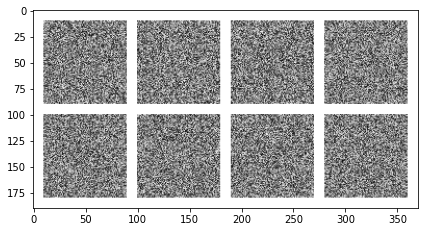

In [46]:
show_batch(imgs_in)

In [47]:
#from MODULES.utilities_ml import SpecialDataSet
#
#train_loader = SpecialDataSet(img=imgs_in,
#                              store_in_cuda=False,
#                              shuffle=True,
#                              drop_last=True,
#                              batch_size=2)
#optimizer = instantiate_optimizer(model=vae, dict_params_optimizer=params["optimizer"])
#epoch_restart = -1
#history_dict = {}
#min_test_loss = 99999999
#    
#for delta_epoch in range(1, 5):
#    epoch = delta_epoch+epoch_restart
#    with torch.autograd.set_detect_anomaly(True):
#        train_metrics = process_one_epoch(model=vae, 
#                                          dataloader=train_loader, 
#                                          optimizer=optimizer, 
#                                          verbose=True)
#        print(train_metrics.pretty_print(epoch))

In [50]:
params = load_json_as_dict("./ML_parameters.json")
vae = CompositionalVae(params)
generated = vae.generate(imgs_in, draw_boxes=True)

('metrics', 'inference', 'imgs')
('area_map', 'prob_map', 'prob_few', 'c_few', 'bb_few', 'big_bg', 'big_img', 'mixing', 'mixing_non_interacting', 'sample_c_map', 'sample_zwhere', 'sample_zinstance', 'sample_zbg', 'kl_zbg', 'kl_logit', 'kl_zwhere', 'kl_zinstance', 'similarity_l', 'similarity_w')
torch.Size([8, 1, 20, 20])


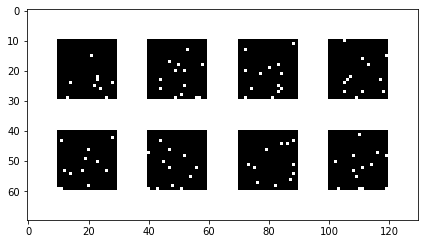

In [51]:
print(generated._fields)
print(generated.inference._fields)
print(generated.inference.sample_c_map.shape)
show_batch(generated.inference.sample_c_map.float())

In [14]:
#generated.inference.prob_map[0,0]

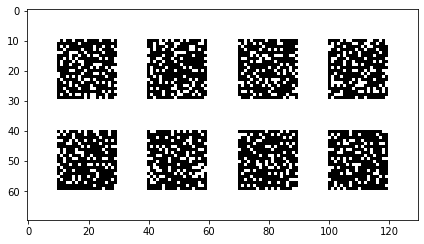

In [15]:
show_batch(generated.inference.prob_map)

Uninitialized: You must initialize neptune-client first. For more information, please visit: https://github.com/neptune-ai/neptune-client#initialize-neptune

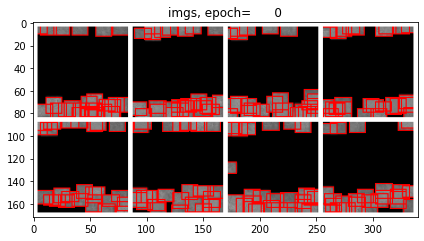

In [16]:
from MODULES.utilities_visualization import plot_reconstruction_and_inference, plot_segmentation

plot_reconstruction_and_inference(generated, epoch=0, prefix="gen_")

In [25]:
vae.prob_corr_factor = 0.0
output = vae.forward(imgs_in, draw_image=True, draw_boxes=True, verbose=False)

tensor(0.4209, grad_fn=<MaxBackward1>)


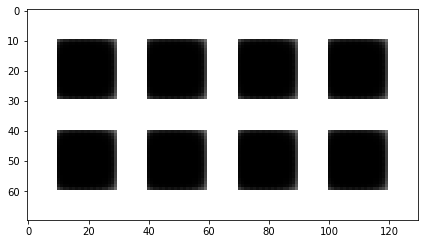

In [31]:
print(torch.max(output.inference.prob_map))
show_batch(output.inference.prob_map)

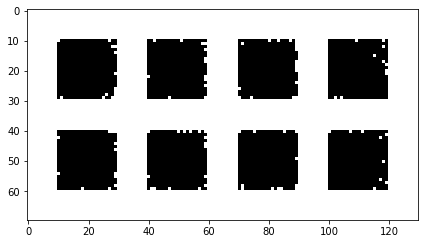

In [32]:
c_map_2 = (torch.rand_like(output.inference.prob_map) < output.inference.prob_map).float()
show_batch(c_map_2)

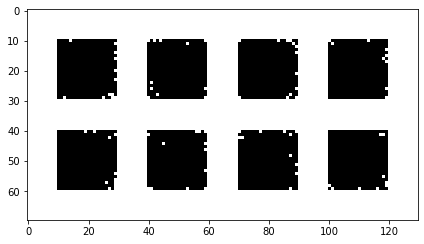

In [33]:
show_batch(output.inference.sample_c_map)

In [ ]:
show_batch(output.inference.sample_c_map)

In [ ]:
print(output.inference.bb_few.bh[..., 0])
print(vae.inference_and_generator.size_min)
print(vae.inference_and_generator.size_max)

In [ ]:
plot_reconstruction_and_inference(output, epoch=0, prefix="rec_")

In [ ]:
vae